In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import ssm
import seaborn as sns
from ssm.util import one_hot, find_permutation

%matplotlib inline

npr.seed(0)
sns.set(palette="colorblind")

In [37]:
# set params of hmm
num_states = 4
obs_dim = 2
input_dim = 3

true_hmm = ssm.HMM(num_states, obs_dim, M=input_dim, observations="input_driven_gaussian",transitions='standard')
true_hmm.observations.Vs = npr.randn(num_states,obs_dim,input_dim)
true_hmm.observations.bs = npr.randn(num_states,obs_dim)

In [38]:
# sample from hmm
time_bins = 1000
inpt = np.column_stack([
    np.sin(2 * np.pi * np.arange(time_bins) / 50)[:, None],
    np.cos(2 * np.pi * np.arange(time_bins) / 50)[:, None],
    np.ones(time_bins)[:, None]])+ 1e-1 * npr.randn(time_bins, input_dim)
true_states, obs = true_hmm.sample(time_bins, input=inpt)

# Compute the true log probability of the data, summing out the discrete states
true_lp = true_hmm.log_probability(obs, inputs=inpt)

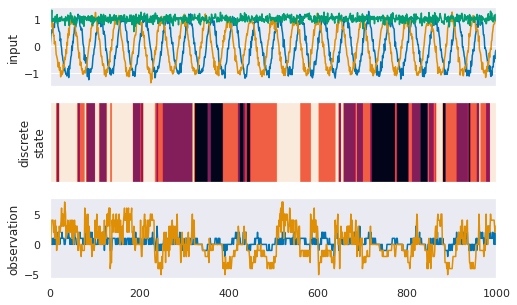

In [39]:
# Plot the data
plt.figure(figsize=(8, 5))

plt.subplot(311)
plt.plot(inpt)
plt.xticks([])
plt.xlim(0, time_bins)
plt.ylabel("input")

plt.subplot(312)
plt.imshow(true_states[None, :], aspect="auto")
plt.xticks([])
plt.xlim(0, time_bins)
plt.ylabel("discrete\nstate")
plt.yticks([])

# Create Cmap for visualizing categorical observations
plt.subplot(313)
plt.plot(obs)
plt.xlim(0, time_bins)
plt.ylabel("observation")
plt.grid(b=None)
plt.show()

In [40]:
# Now create a new HMM and fit it to the data with EM
N_iters = 100
hmm = ssm.HMM(num_states, obs_dim, input_dim,observations="input_driven_gaussian",transitions="standard")

# Fit
hmm_lps = hmm.fit(obs, inputs=inpt, method="em", num_iters=N_iters)

  0%|          | 0/100 [00:00<?, ?it/s]

In [41]:
# Find a permutation of the states that best matches the true and inferred states
hmm.permute(find_permutation(true_states, hmm.most_likely_states(obs, input=inpt)))
inferred_states = hmm.most_likely_states(obs, input=inpt)

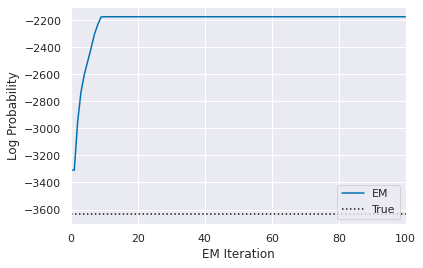

In [42]:
# Plot the log probabilities of the true and fit models
plt.plot(hmm_lps, label="EM")
plt.plot([0, N_iters], true_lp * np.ones(2), ':k', label="True")
plt.legend(loc="lower right")
plt.xlabel("EM Iteration")
plt.xlim(0, N_iters)
plt.ylabel("Log Probability")
plt.show()

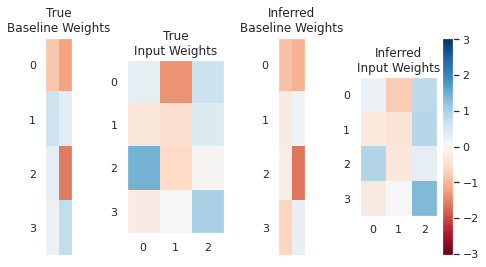

In [44]:
# Plot the true and inferred input effects
plt.figure(figsize=(8, 4))

vlim = max(abs(true_hmm.observations.bs).max(),
           abs(true_hmm.observations.Vs).max(),
           abs(hmm.observations.bs).max(),
           abs(hmm.observations.Vs).max())

plt.subplot(141)
plt.imshow(true_hmm.observations.bs, vmin=-vlim, vmax=vlim, cmap="RdBu", aspect=num_states)
plt.xticks([])
plt.yticks(np.arange(num_states))
plt.title("True\nBaseline Weights")
plt.grid(b=None)


plt.subplot(142)
plt.imshow(true_hmm.observations.Vs[:,0,:], vmin=-vlim, vmax=vlim, cmap="RdBu", aspect=num_states/input_dim)
plt.xticks(np.arange(input_dim))
plt.yticks(np.arange(num_states))
plt.title("True\nInput Weights")
plt.grid(b=None)


plt.subplot(143)
plt.imshow(hmm.observations.bs, vmin=-vlim, vmax=vlim, cmap="RdBu", aspect=num_states)
plt.xticks([])
plt.yticks(np.arange(num_states))
plt.title("Inferred\nBaseline Weights")
plt.grid(b=None)


plt.subplot(144)
plt.imshow(hmm.observations.Vs[:,0,:], vmin=-vlim, vmax=vlim, cmap="RdBu", aspect=num_states/input_dim)
plt.xticks(np.arange(input_dim))
plt.yticks(np.arange(num_states))
plt.title("Inferred\nInput Weights")
plt.grid(b=None)
plt.colorbar()
plt.show()

In [ ]:
import pdb
pdb.pm()

In [ ]:
inpt.shape